In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

#### Merge the 12 months of sales data into a single CSV file

In [2]:
# let's make a list compreension for all the data in the folder
files = [file for file in os.listdir('../data')] 
# let's make a pandas DataFrame
all_months_data = pd.DataFrame()
# makes a loop for concat the data
for file in files:
    data = pd.read_csv('../data/' + file)
    all_months_data = pd.concat([all_months_data, data])
# export all data to csv    
all_months_data.to_csv("all_data.csv", index=False)

### Read in updated DataFrame
###### Let's see the data and how it looks.

In [3]:
sales_data = pd.read_csv('all_data.csv') # read data
sales_data # show data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
"Head"
sales_data.head() # Checking the first 5 rows of data
# Checking the last 5 rows of data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
"Tail"
sales_data.tail() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


### Data Preprocessing
Data preprocessing can refer to manipulation or dropping of data before it is used in order to ensure or
enhance performance, and is an important step in the data mining process. The phrase "garbage in, garbage out" 
is particularly applicable to data mining and machine learning projects.

In [6]:
# getting the information 
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Uniqueness Categorical Variables
Let's have a look at categorical variables. How many unique values of these variables.

In [7]:
categorical = sales_data.select_dtypes(['category', 'object']).columns # getting the Uniqueness catrgorical variable
for col in categorical:
    print('{} : {} unique value(s)'.format(col, sales_data[col].nunique()))

Order ID : 178438 unique value(s)
Product : 20 unique value(s)
Quantity Ordered : 10 unique value(s)
Price Each : 24 unique value(s)
Order Date : 142396 unique value(s)
Purchase Address : 140788 unique value(s)


### How many missing data points do we have?
Ok, now we know that we do have some missing values. Let's see how many we have in each column.

In [8]:
# get the number of missing data points per column
missing_values_count = sales_data.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

It might be helpful to see what percentage of the values in our dataset were missing to give us 
a better sense of the scale of this problem:

In [9]:
# how many total missing values do we have?
total_cells = np.product(sales_data.shape)
total_missing = missing_values_count.sum()
# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(f"{percent_missing:.2f}%")

0.29%


### Clean up the Data!¶
The first step in this is figuring out what we need to clean. I have found in practice, 
that you find things you need to clean as you perform operations and get errors. 
Based on the error, you decide how you should go about cleaning the data.

In [10]:
# let's drop the rows of NaN data!
sales_data = sales_data.dropna(how='all')
# okay, let's check it again!
"NaN Value:"
sales_data[sales_data.isna().any(axis=1)]
# future warning! ValueError: invalid literal for int() with base 10: 'Or'
"Clean Future Warnings:"
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Convert Quantity Ordered column and Price Each column¶
Let's convert the Quantity Ordered column and Price Each column to Numeric Type, 
because we will add some future features, and we 
need to multiply this two column.

In [11]:
# convert the data
sales_data['Quantity Ordered'], sales_data['Price Each'] = sales_data['Quantity Ordered'].astype('int64'), sales_data['Price Each'].astype('float')
# and check it 
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


### Convert Order Date column
And let's convert Order Date column too, so we can take the Year, Month, and the other date easily.

In [12]:
# convert it using to_datetime() funct
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
# let's see it
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


### Recap Data
This is some point that we have.

We have total  186850  records and  6  columns cateogircal type

The total of missing value that we have is  0.29167 %

Order ID :  178438  unique value(s)

Product :  20  unique value(s)

Quantity Ordered :  10  unique value(s)

Price Each :  24  unique value(s)

Order Date :  142396  unique value(s)

Purchase Address :  140788  unique value(s)


#### Next, we will try to do some exploration and visualization. But we need to do some Data Preparation first.

### Data Preparation
Data preparation is the act of manipulating raw data into a form that can 
readily and accurately be analysed, e.g. for business purposes. Data Preparation 
is a pre-processing step in which data from one or more sources is cleaned and transformed 
to improve its quality prior to its use in business analytics.


### Add Month, Hour, Minute, Sales, Cities Column

In [13]:
def augment_data(data):
    
    """
    Adding new features to
    our data, adding Month Data,
    Hour Data, Minute Data, Sales Data,
    and Cities Column
    
    Returning:
        data with new features
    """
    
    # funtction to get the city in the data
    def get_city(address):
        return address.split(',')[1]
    
    # funtction to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    # let's get the year data in order date column
    data['Year'] = data['Order Date'].dt.year
    
    # let's get the month data in order date column
    data['Month'] = data['Order Date'].dt.month
    
    # let's get the houe data in order date column
    data['Hour'] = data['Order Date'].dt.hour 
    
    # let's get the minute data in order date column
    data['Minute'] = data['Order Date'].dt.minute 
    
    # let's make the sales column by multiplying the quantity ordered colum with price each column
    data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 
    
    # let's get the cities data in order date column
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    
    return data # returning data

# and see it
sales_data = augment_data(sales_data)
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,27,11.99,Los Angeles (CA)


### Data Analysis
Data Analysis is the process of systematically applying statistical and/or 
logical techniques to describe and illustrate, condense and recap, and evaluate data. 
Indeed, researchers generally analyze for patterns in observations through the entire
data collection phase (Savenye, Robinson,  2004 ).
analyze and investigate data sets and summarize their main characteristics, often employing
data visualization methods.

Or, the easier, you can say in Data Analysis we (Data Scientist or Data Analyst) what ever you 
want to call that, in this section, we're looking for the correlation and also the relationships 
between every data (features and labels) or the variables using and applying the statistical 
and visualization methods for looking some patterns.

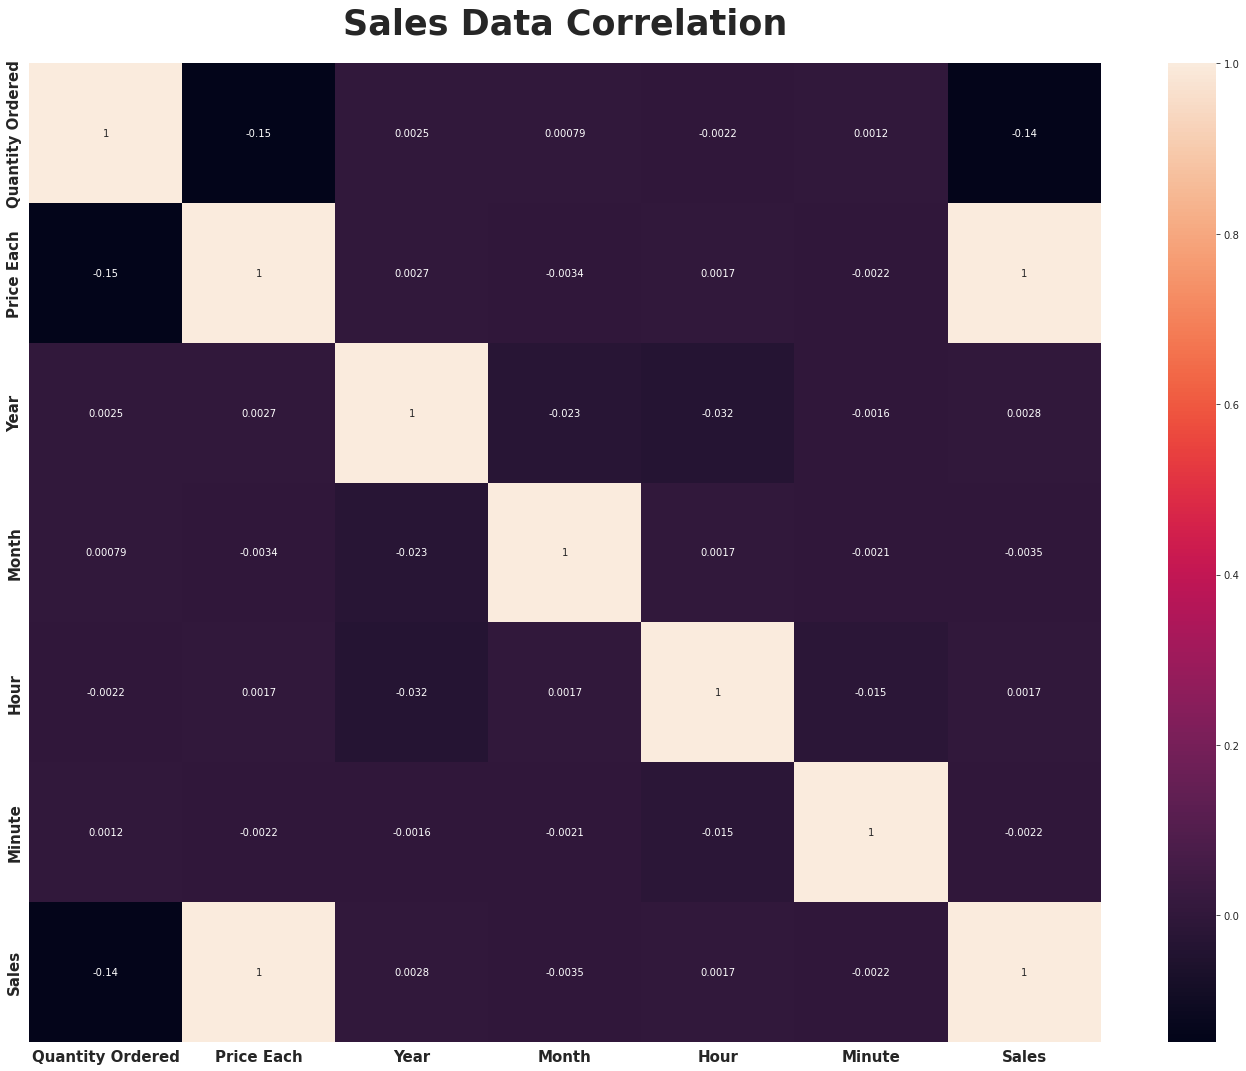

In [14]:
sns.set_style("whitegrid") # set the seaborn style
# let's make a correlation matrix for `cop_data`
plt.figure(figsize=(24, 18)) # figure the size
sns.heatmap(sales_data.corr(), annot=True) # create a heatmap
plt.title("Sales Data Correlation", weight="bold", fontsize=35, pad=30) # title
plt.xticks(weight="bold", fontsize=15) # x-ticks
plt.yticks(weight="bold", fontsize=15); # y-ticks

In [15]:
# Let's see the correlation from `sales_data`
(sales_data.corr()['Sales'] # transform it into data corr
           .sort_values(ascending=False) # sort values
           .to_frame() # change it into data frame
           .T) # transpose it

,Sales,Price Each,Year,Hour,Minute,Month,Quantity Ordered
Sales,1.0,0.999203,0.002824,0.001668,-0.002162,-0.003466,-0.139417


In [16]:
# statistical measure of sales data without object type of data
sales_data_numeric = sales_data.describe(include=[np.number]) 
"Statistical Measure of Sales Data in Numeric Data"
sales_data_numeric

,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Sales
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019.000183,7.059140,14.413305,29.481361,185.490917
std,0.442793,332.731330,0.013521,3.502996,5.423416,17.317573,332.919771
min,1.000000,2.990000,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019.000000,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019.000000,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2020.000000,12.000000,23.000000,59.000000,3400.000000


In [17]:
# statistical measure of sales data without numeric type of data
sales_data_object = sales_data.describe(exclude=[np.number],datetime_is_numeric=True)
"Statistical Measure of Sales Data in Object / Str Data"
sales_data_object

,Order ID,Product,Order Date,Purchase Address,Cities
count,185950,185950,185950,185950,185950
unique,178437,19,NaN,140787,10
top,160873,USB-C Charging Cable,NaN,"193 Forest St, San Francisco, CA 94016",San Francisco (CA)
freq,5,21903,NaN,9,44732
mean,NaN,NaN,2019-07-18 21:54:38.887550464,NaN,NaN
min,NaN,NaN,2019-01-01 03:07:00,NaN,NaN
25%,NaN,NaN,2019-04-16 21:05:15,NaN,NaN
50%,NaN,NaN,2019-07-17 20:40:30,NaN,NaN
75%,NaN,NaN,2019-10-26 08:14:00,NaN,NaN
max,NaN,NaN,2020-01-01 05:13:00,NaN,NaN


### Univariate Analysis
Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, 
it can be inferential or descriptive. The key fact is that only one variable is involved. 
Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

In [18]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, title1, title2):
    
    """
    Showing visualization of univariate
    analysis with displot and qqplot
    visualization from seaborn and statsmodel
    library.
    
    Parameters
    ----------
    data : DataFrame, array, or list of arrays, optional
        Dataset for plotting. If ``x`` and ``y`` are absent, this is
        interpreted as wide-form. Otherwise it is expected to be long-form. 
    title1: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
    title2: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
        
    Returns
    -------
    fig : matplotlib figure
        Returns the Figure object with the plot drawn onto it.
    """
    
    fig, (ax1, ax2) = plt.subplots( # subplots
        ncols=2, # num of cols
        nrows=1, # num of rows
        figsize=(20, 6) # set the width and high
    )

    sns.distplot( # create a distplot visualization
        data, # data
        ax=ax1, # axes 1
        kde=True, # kde
        color=color # color
    )
    
    ax1.set_title( # set the title 1
        title1, 
        weight="bold", # weight
        fontsize=25, # font-size
        pad=30 # padding
    ) 
    
    qqplot( # qqplot (quantile plot)
        data, # data
        ax=ax2, # axes 2
        line='s' # line 
    )
    
    ax2.set_title( # set the title 2
        title2, 
        weight="bold", # weight
        fontsize=25, # font-size
        pad=30 # padding
    )
    
    return fig # returning the figure

Let's try to find the proportion that lies in between two standard deviation ($\sigma$) from mean ($\mu$) using Chebychev's Theorem, and let's try to interprete...

Chebychev's Theorem

$$ \begin{aligned} 1 - \frac{1}{k^2}: k &= 2 -> 1 - \frac{1}{2^2} = \frac{3}{4} -> 75 \\ k &= 3 -> 1 - \frac{1}{3^2} = \frac{8}{9} -> 88.9 \end{aligned} $$
How to find Standard Deviation ($\sigma$)?

Here's the Formula:

$$ \begin{aligned} \sigma &= \sqrt{\sigma^2} = \sqrt{\frac{\sum{(x - \mu)^2}}{N}} \\ s &= \sqrt{s^2} = \sqrt{\frac{\sum{(x - \bar{x})^2}}{n - 1}} \end{aligned} $$
How to find Mean ($\mu$)?

Here's the Formula:

$$ \begin{aligned} \mu = \frac{\sum{x}}{N} \\ \bar{x} = \frac{\sum{x}}{n} \end{aligned} $$

/tmp/ipykernel_4886/1770960597.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( # create a distplot visualization


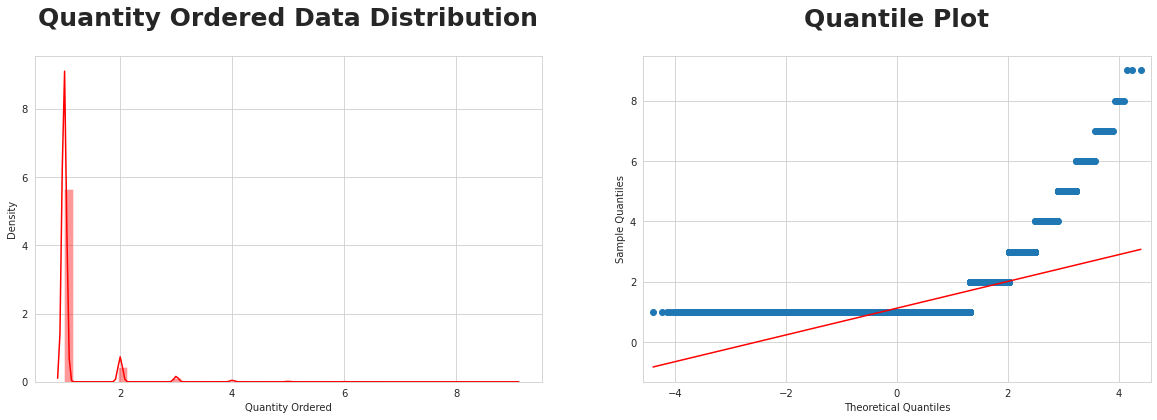

In [19]:
# Quantity Ordered Data
univariate_analysis( # call the function
    data=sales_data['Quantity Ordered'], # put the data
    color='red', # pick the color
    title1='Quantity Ordered Data Distribution', # title1
    title2='Quantile Plot' # title2
);

Here we can see it, the average customer buys $1$ item/product more often, there are also a few customers who buy $2$ or $4$ items/product at once, more than that it is very rare.

Quantity Ordered
Find the proportion that lies in between two standard deviation ($\sigma$) from mean ($\mu$), and let's try to interprete that. and In the Quantity Ordered Data, the $\mu = 1.12$ and the $\sigma = 0.44$, then without further ado let's calculate it.

Calculation:
$1.12 - 2(0.44) = 0.2$
$1.12 + 2(0.44) = 2$
Interpretation:
At least $75\%$ of the Sales Data Quantity Ordered population in the USA has a Quantity Ordered range from $0 - 2$ item/product.

/tmp/ipykernel_4886/1770960597.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( # create a distplot visualization


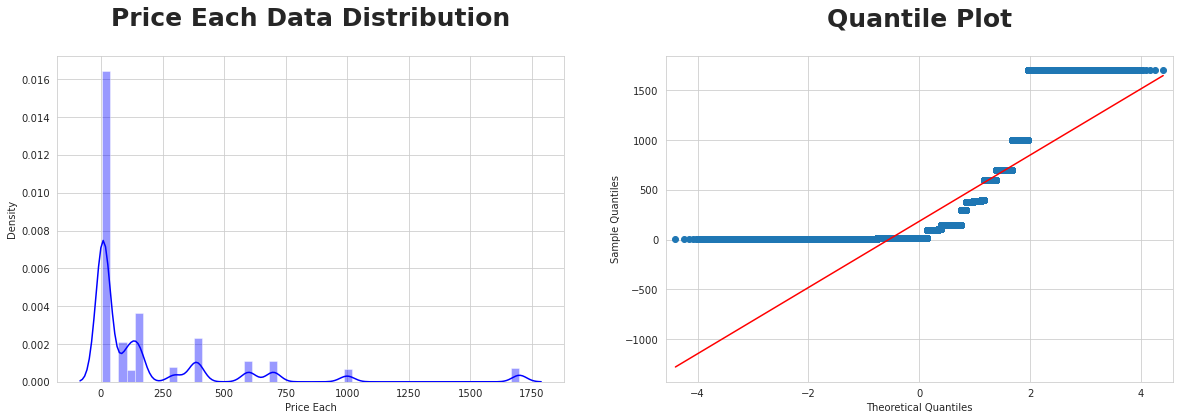

In [20]:
# Price Each Data
univariate_analysis( # call the function
    data=sales_data['Price Each'], # put the data
    color='blue', # pick the color 
    title1='Price Each Data Distribution', # title1 
    title2='Quantile Plot' # title2
);

### Price Each 

Find the proportion that lies in between two standard deviation ($\sigma$) from mean ($\mu$), and let's try to interprete that. and in the Price Each Data, the $\mu = 184.3$ and the $\sigma = 332.7$, then without further ado let's calculate it.

Calculation:
$184.3 - 2(332.7) = -481$
$184.3 + 2(332.7) = 849.7$
Interpretation:
At least $75\%$ of the population Sales Price data for each item/product in the USA has a price range for each item/product from $0 - 849.7$ (USD).

/tmp/ipykernel_4886/1770960597.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( # create a distplot visualization


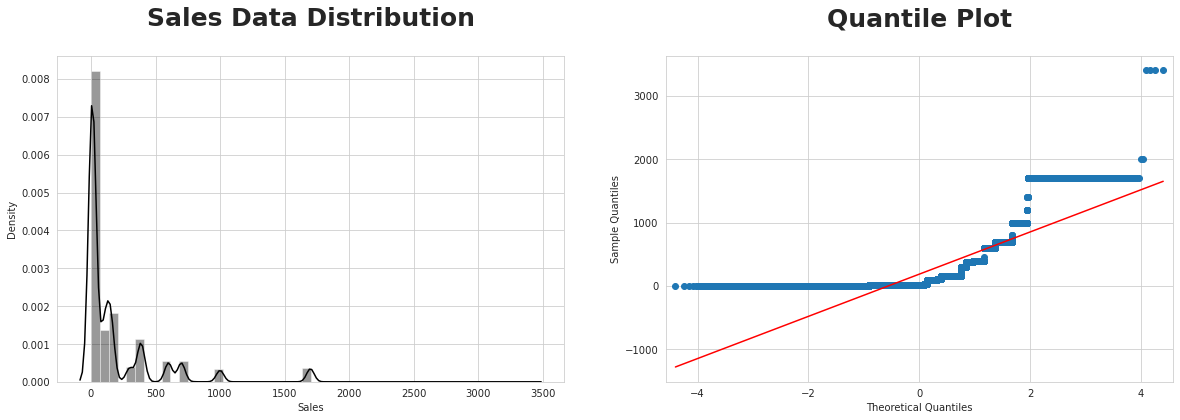

In [21]:
# Sales Data
univariate_analysis( # call the function
    data=sales_data['Sales'], # put the data 
    color='black', # pick the color
    title1='Sales Data Distribution', # title1 
    title2='Quantile Plot' # title2
);

### Sales
Find the proportion that lies in between two standard deviation ( σ ) from mean ( μ ), and let's try to interprete that. and in the Sales Data, the  μ=185.4  and the  σ=332.9 , then without further ado let's calculate it.

Calculation:
185.4−2(332.9)=−480 
185.4+2(332.9)=851.19 
Interpretation:
At least  75%  of population Sales Data customers in USA have Sales range from  0−851.19  (USD).

In [22]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = sales_data.skew().sort_values(ascending=False).to_frame()
skew_value

/tmp/ipykernel_4886/163832373.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_value = sales_data.skew().sort_values(ascending=False).to_frame()


,0
Year,73.933795
Quantity Ordered,4.833164
Sales,2.881913
Price Each,2.872149
Minute,0.002580
Order ID,0.000719
Month,-0.088588
Hour,-0.530377


It can be seen that most of the data we have are in the form of a normal distribution, and there are two skewed data.

### Task:

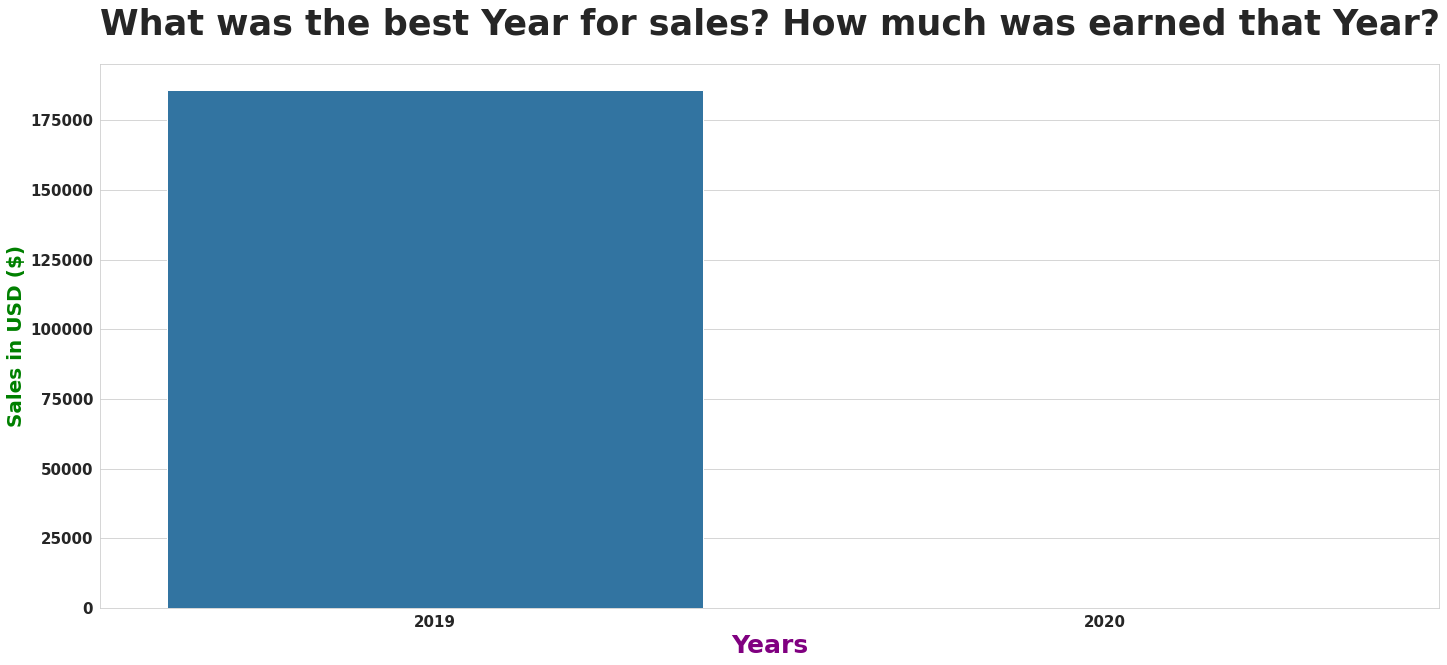

In [23]:
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes count plot 
sns.countplot(
    x="Year", 
    data=sales_data
)
plt.title( # title
    "What was the best Year for sales? How much was earned that Year?", 
    weight="bold", # weiqht
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Years", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in USD ($)", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### Answer:
When viewed from the data above,  2019  was the best year that had the highest number of sales,
which was  $34,483,365 , compared to  2020  which only had  $8,670  in sales, this is due to the lack of 
data in  2020  which caused a data imbalance.

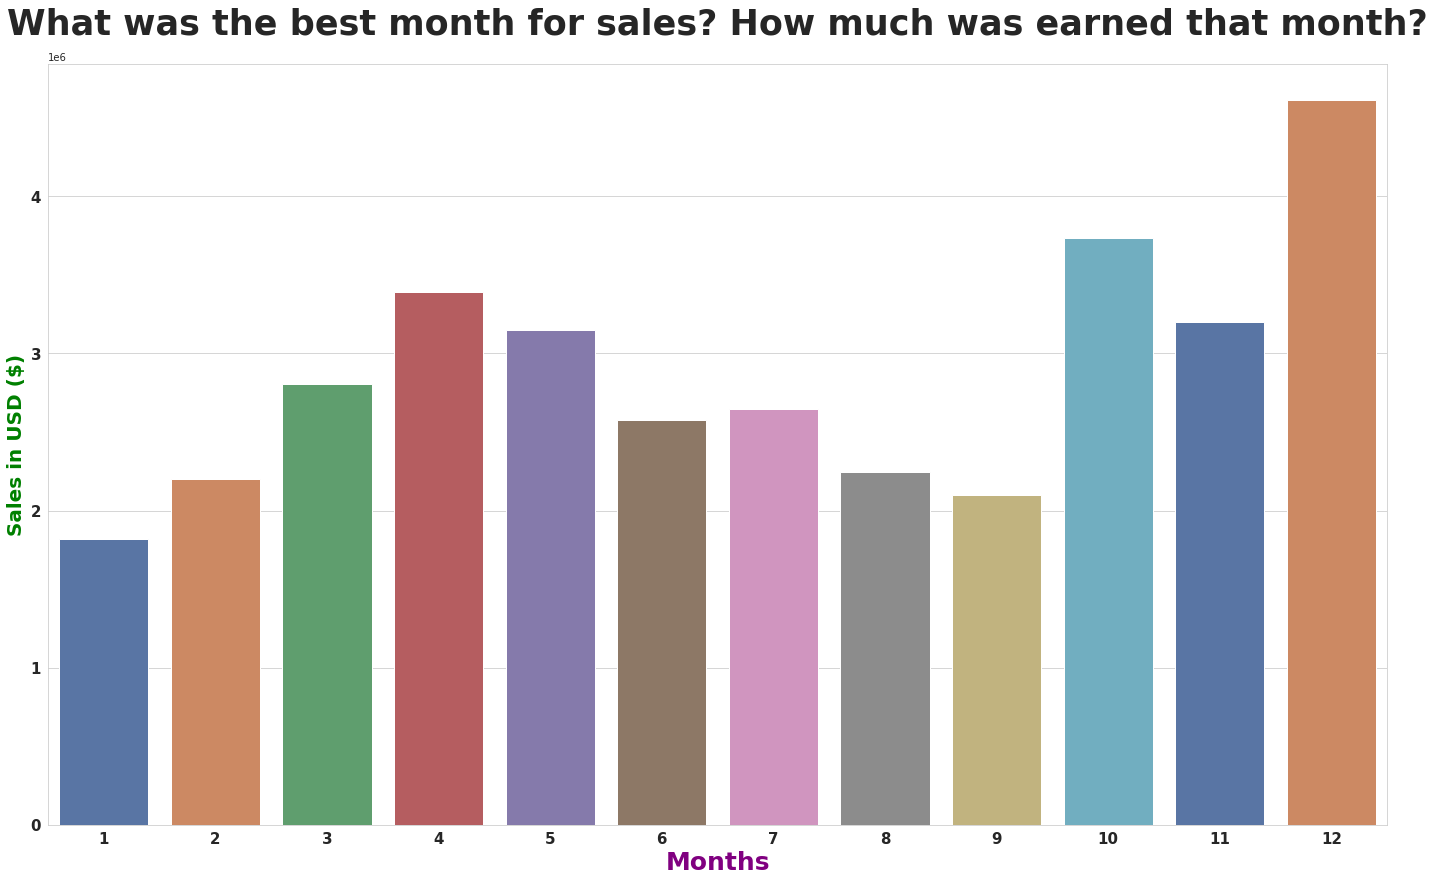

In [24]:
# group the Month cols
sum_of_month_and_earned = sales_data.groupby('Month').sum().astype('int')
# let's plot it
plt.figure(figsize=(24, 14)) # figuring the size
# makes bar plot 
sns.barplot( # barplot
    x=sum_of_month_and_earned.index, # x-axis
    y=sum_of_month_and_earned["Sales"], # y-axis
    data=sum_of_month_and_earned, # data
    palette="deep" # palette
)
plt.title( # title
    "What was the best month for sales? How much was earned that month?", 
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Months", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in USD ($)", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### Answer:
The best month to sell is shown in the visualization above is December which has a record number of sales reaching  $4,613,443 , sales,This may be because in December there is Christmas, where many people buy groceries to make cakes or toys as gifts for loved ones.

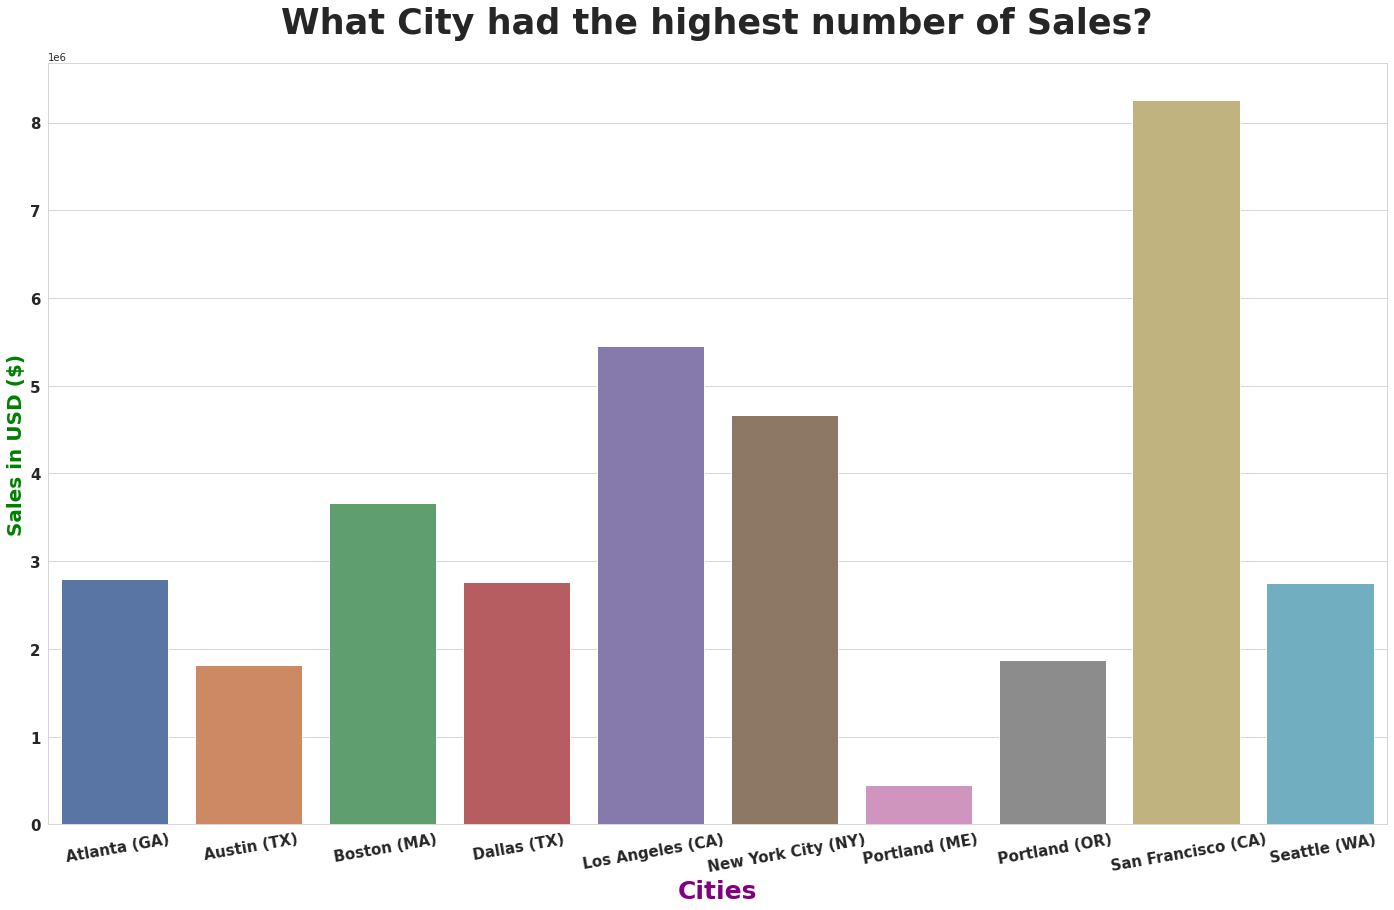

In [25]:
# group of the highest number of sales in city
highest_number_of_sales = sales_data.groupby('Cities').sum().astype('int')
# let's plot it
plt.figure(figsize=(24, 14)) # figuring the size
# makes bar plot 
sns.barplot( # barplot
    x=highest_number_of_sales.index, # x-axis
    y=highest_number_of_sales["Sales"], # y-axis
    data=highest_number_of_sales, # data
    palette="deep" # palette
)
plt.title( # title
    "What City had the highest number of Sales?", 
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Cities", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=10
)
plt.ylabel( # y-label
    "Sales in USD ($)", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### Answer:
The city that has the most sales data in the above visualization is San Francisco,
with total sales reaching  $8,262,203 .

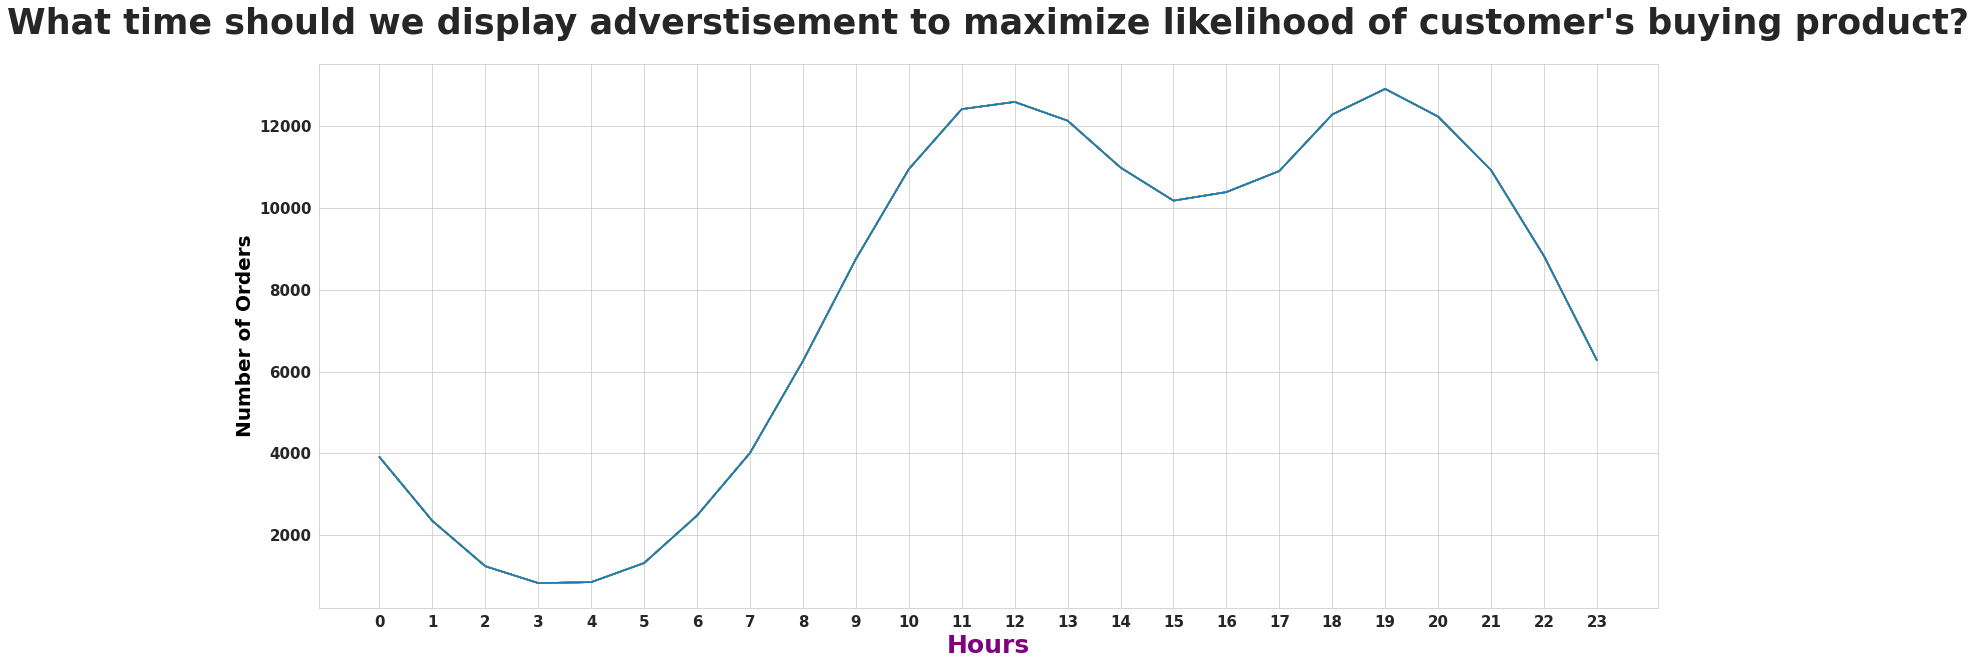

In [26]:
# let's prepare the value for the x-axis
hours = [hour for hour, df in sales_data.groupby('Hour')]
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes bar plot 
plt.plot( # plot
    hours, # x-axis
    sales_data.groupby(['Hour']).count() # data
)
# let's add grid
plt.grid(True)
plt.title( # title
    "What time should we display adverstisement to maximize likelihood of customer's buying product?", 
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30
)
plt.xlabel( # x-label
    "Hours", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    ticks=hours, # labels
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Number of Orders", 
    weight="bold", # weight
    color="black", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### Answer:
My recommendation if you want to place an ad, place the ad at  9  am or  10  am, because there is an increase in the number of orders at that time.

## What products are most often sold together?

In [27]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = sales_data[sales_data['Order ID'].duplicated(keep=False)]
# create a new column
data['Grouped'] = sales_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# let's make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()
# create a new variable for Counter
count = Counter()
# make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# and make another for loop    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


/tmp/ipykernel_4886/397145961.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grouped'] = sales_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


### Answer:
Products that are often sold simultaneously are iPhone and Lightning Charging Cable which sold  1005  orders, and Google Phone, USB-C Charging Cable ranked second with  987  orders

/tmp/ipykernel_4886/1263635643.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels( # x-ticks


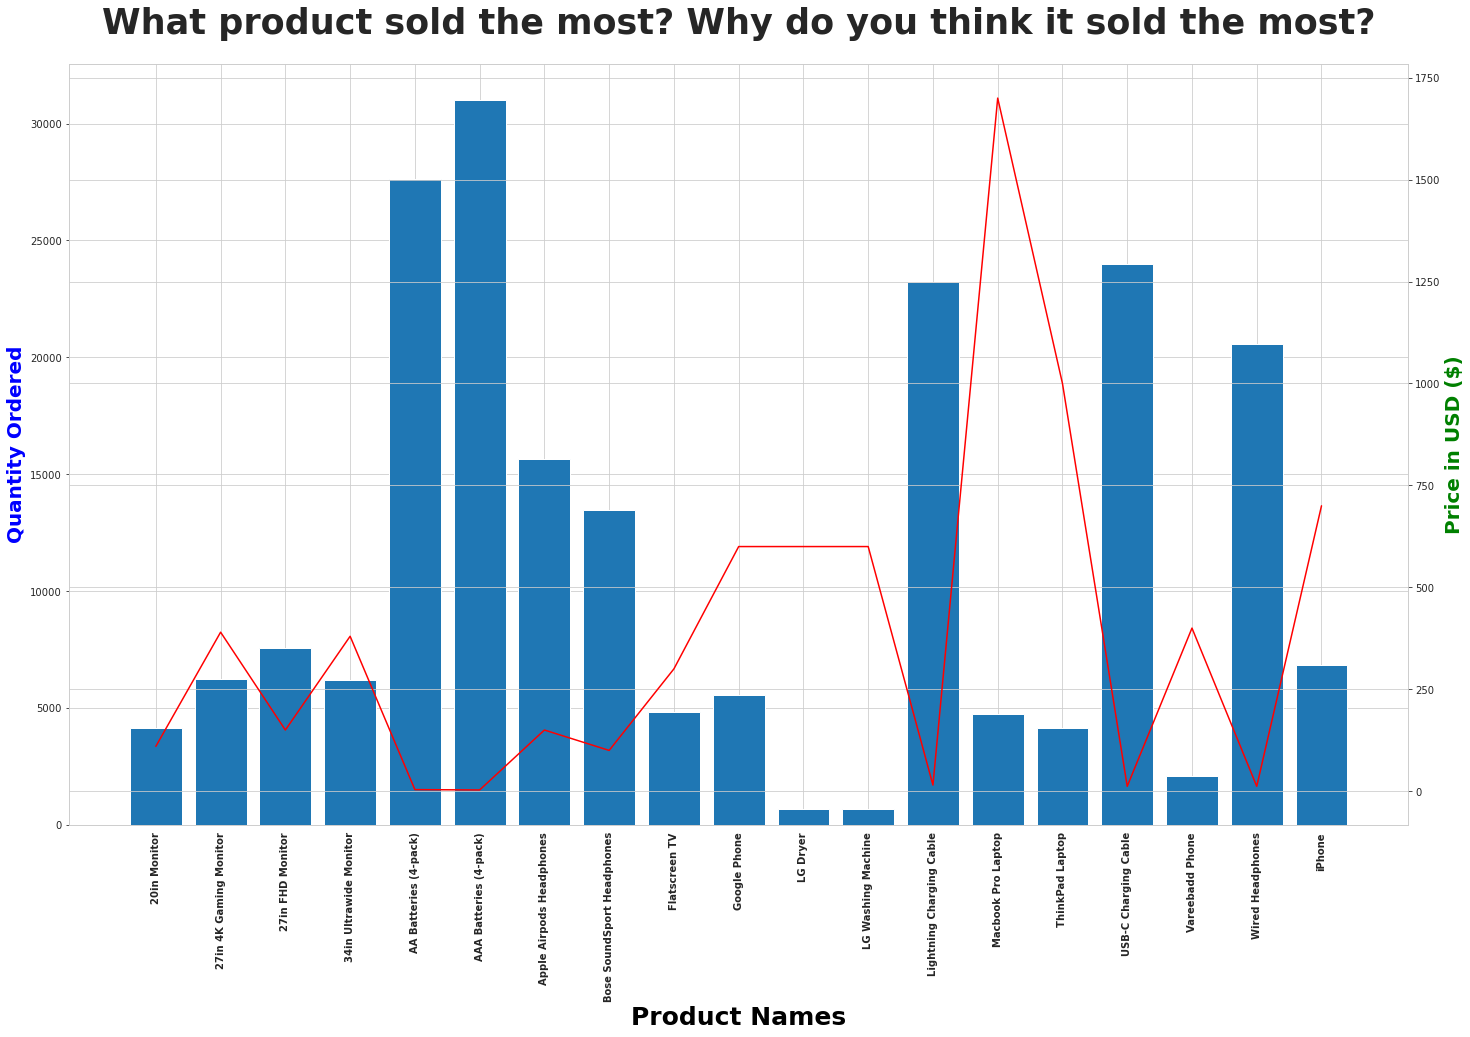

In [31]:
# lets prepare the varables for the plotting
# group the product
product_group = sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = sales_data.groupby('Product').mean()['Price Each']
products = [product for product, df in product_group]
"""Visualization"""
# let's make a subplots
fig, ax1 = plt.subplots(figsize=(24, 14))
ax2 = ax1.twinx()
# AXES 1
ax1.bar(products, quantity_ordered)
ax1.set_title( # title
    "What product sold the most? Why do you think it sold the most?",
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
ax1.set_xlabel( # x-label
    "Product Names",
    weight="bold", # weight
    fontsize=25, # font-size
    color="black" # color
)
ax1.set_ylabel( # y-label
    "Quantity Ordered", 
    color="blue", # color
    fontsize=20, # font-size
    weight="bold" # weight
)
ax1.set_xticklabels( # x-ticks
    products, # ticks
    rotation="vertical", # rotation 
    weight="bold" # weight
)
# AXES 2
sns.lineplot( # plot
    # products, # x-axis
    prices, # y-axis
    color="red"
)
ax2.set_ylabel( # y-label
    "Price in USD ($)", 
    color="green", # color
    fontsize=20, # font-size
    weight="bold" # weight
);

### Answer:
The most sold products are AA Batteries (4-pack), AA Batteries (4-pack), Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones. Why do these products sell more than others? This is because the prices of the most ordered products have a low price compared to other products, for example, the LG Dryer, or the LG Washing Machine, which have a price of around  $500−700 .

How Much Probability?

Empirical Probability

P(E)=FrequencyEventETotalFrequency
 


Rule of Complementary Events:

P(E)+P(E′)=1P(E)=1−P(E′)P(E′)=1−P(E)

In [33]:
def statistical_probability(frequency, total_frequency):
    return frequency / total_frequency

product = sales_data.Product.value_counts().sum() 

### How much probability for next people will order USB-C Charging Cable?

In [34]:
usb_charging = sales_data[sales_data.Product == 'USB-C Charging Cable'].value_counts().sum()
# Calculating USB-C Charging Probability
P_USB = statistical_probability(usb_charging, product)
Pprime_USB = 1 - P_USB
print('Probability for next people will order USB-C Charging Cable: %.2f%%' % P_USB)
print('Probability for next people will not order USB-C Charging Cable: %.2f%%' % Pprime_USB)

Probability for next people will order USB-C Charging Cable: 0.12%
Probability for next people will not order USB-C Charging Cable: 0.88%


### Answer
The probability for next people will order USB-C Charging Cable is  12% , Because there are only  12%  chance we can say this an unusual event.

### How much probability for next people will order iPhone?

In [35]:
iphone = sales_data[sales_data.Product == 'iPhone'].value_counts().sum()
# Calculating iPhone Probability
P_iphone = statistical_probability(iphone, product)
Pprime_iphone = 1 - P_iphone
print('Probability for next people will order iPhone: %.2f%%' % P_iphone)
print('Probability for next people will not order iPhone: %.2f%%' % Pprime_iphone)

Probability for next people will order iPhone: 0.04%
Probability for next people will not order iPhone: 0.96%


### Answer
The probability for next people will order iPhone is  4% , Because there are only  4%  chance we can say this an unusual event.

### How much probability for next people will order Google Phone?

In [36]:
google_phone = sales_data[sales_data.Product == 'Google Phone'].value_counts().sum()
# Calculating Google Phone Probability
P_google_phone = statistical_probability(google_phone, product)
Pprime_google_phone = 1 - P_google_phone
print('Probability for next people will order Google Phone: %.2f%%' % P_google_phone)
print('Probability for next people will not order Google Phone: %.2f%%' % Pprime_google_phone)

Probability for next people will order Google Phone: 0.03%
Probability for next people will not order Google Phone: 0.97%


#### Answer
The probability for next people will order Google Phone is  3% , Because there are only  3%  chance we can say this an unusual event.

### How much probability for next people will order Wired Headphones?

In [37]:
wired_headphones = sales_data[sales_data.Product == 'Wired Headphones'].value_counts().sum()
# Calculating Wired Headphones Probability
P_wired_headphones = statistical_probability(wired_headphones, product)
Pprime_wired_headphones = 1 - P_wired_headphones
print('Probability for next people will order Wired Headphones: %.2f%%' % P_wired_headphones)
print('Probability for next people will not order Wired Headphones: %.2f%%' % Pprime_wired_headphones)

Probability for next people will order Wired Headphones: 0.10%
Probability for next people will not order Wired Headphones: 0.90%


#### Answer.
The probability for next people will order Wired Headphones is  10% , Because there are only  10%  chance we can say this an unusual event.